# 라이브러리 로드

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
from glob import glob
import os

In [2]:
# 경고창 무시 
import warnings
warnings.filterwarnings('ignore')

# 한글폰트 사용을 위한 세팅

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 가져와야 할 데이터 셋이 54개니까 반복문으로 가져오자 

In [4]:
file_path = '.\\data\\'
file_name_os = os.listdir(file_path)
file_name_glob = glob(file_path+'*')

In [5]:
#for문으로 반복해서 데이터 셋 로드 한 후 concat으로 병합 

df_list = []
for fn in file_name_os:
    df_list.append(pd.read_excel(file_path + fn))
df = pd.concat(df_list)

In [6]:
df.head()

,검색기간,애견,카페,맛집,강아지,여행,멍스타그램,반려견,애견동반카페,식당,...,트로피,#@MD#f4f,가파도,화장품,서울시,커플여행,미니,본가,마켓,휴무
0,21y-06m-04w,231,163,107,104,101,91,81,58,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,21y-07m-01w,375,230,159,194,246,106,106,80,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,21y-07m-02w,327,215,137,152,149,109,96,86,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,21y-07m-03w,289,179,113,115,154,103,92,60,55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,21y-07m-04w,336,258,38,141,217,95,121,88,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#인덱스 초기화 해주고 나서 컬럼으로 올라가 index도 떨궈줌 
df = df.reset_index().drop(['index'], axis = 1)

In [8]:
df.head()

,검색기간,애견,카페,맛집,강아지,여행,멍스타그램,반려견,애견동반카페,식당,...,트로피,#@MD#f4f,가파도,화장품,서울시,커플여행,미니,본가,마켓,휴무
0,21y-06m-04w,231,163,107,104,101,91,81,58,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21y-07m-01w,375,230,159,194,246,106,106,80,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21y-07m-02w,327,215,137,152,149,109,96,86,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21y-07m-03w,289,179,113,115,154,103,92,60,55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21y-07m-04w,336,258,38,141,217,95,121,88,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#모든 컬럼 출력 
pd.set_option('display.max_columns', None)

# 데이터 확인 및 클렌징 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Columns: 501 entries, 검색기간 to 휴무
dtypes: float64(461), int64(39), object(1)
memory usage: 203.7+ KB


In [11]:
df.isna().sum()

검색기간     0
애견       0
카페       0
맛집       0
강아지      0
        ..
커플여행    41
미니      46
본가      46
마켓      48
휴무      49
Length: 501, dtype: int64

In [12]:
df.isna().mean()

검색기간    0.000000
애견      0.000000
카페      0.000000
맛집      0.000000
강아지     0.000000
          ...   
커플여행    0.788462
미니      0.884615
본가      0.884615
마켓      0.923077
휴무      0.942308
Length: 501, dtype: float64

In [13]:
#컬럼들 결측치의 의미는 검색량이 0 이라는 뜻이므로 결측치 0으로 다 메꿔주기
df.fillna('0')

,검색기간,애견,카페,맛집,강아지,여행,멍스타그램,반려견,애견동반카페,식당,댕댕이,애견카페,광주,커피,테라스,답변,부산,스타,산책,펫스타그램,제주도,분위기,말티즈,주차,회원권,견스타그램,개스타그램,데이트,강남,방문,빙수,펫,숙소,강원도,호빵,웨딩,제주,운동장,형제,광고모델,볶음밥,팥빙수,파스타,일요일,travel,녹차,강남구,유행,피자,댕스타그램,녹차빙수,케이준,프라이드,제주여행,반려동물,개,적립카드,바람,인천,독스타그램,주차장,스타그램,대형,주소,테이블,시럽,골든리트리버,모델,스케줄,메뉴,데이트코스,매트,브런치,지도자,라페스타,필라테스강사,집중,yoga,산전,산후,재활,개인레슨,시간,전화,강의,초보,반려견스타그램,코스,잔디,문의,의류,비,생활,베이커리,집사,대부도,대구,수영장,서귀포,맛스타그램,종류,토이,키즈,계곡,그룹,애견호텔,포레스트,카드결제,피크닉,공휴일,차병원,캠핑장,주말,리조트,글램핑,장모,웨딩네일,디저트,평일,애견용품,와인,스타필드,광고,파크,신상,채팅,개린이,날씨,레스토랑,여행지,여름휴가,출신,누나,일러스트,바베큐,풀빌라,요가,스튜디오,회원,안면도,필라테스,꼬모,강사,관리,자격증,원장,가방,물놀이,레슨,여성,양평,호두,사랑둥이,야외테라스,vat,주차금지,대형견스타그램,사회적거리,리틀포레스트,포메라니안,파주,여유,스콘,정원,출처,믹스견,현금,경기,규모,마당,미용,타투,타워,야당,위생,남매,유치원,이모,야외수영장,꽃지,꽃지해수욕장,갯벌,게국지,휴양림,갯벌체험,안면도펜션,자연휴양림,안면도자연휴양림,매너,태안군,애견스타그램,유기견,가족여행,강아지그램,애견캠핑,반려견그램,캠프,드로잉,애견펜션,인생사진,카페스타그램,기침,에어컨,춘천,스테이크,해변,압구정,만두,캐리어,잉글리쉬,충주,웰시코기,신혼부부,브런치카페,휴무일,바닷가,돈까스,신혼,춘천시,제주시,배변,부산여행,폼피츠,힐링캠프,노트북,시그니처,코카스파니엘,페키니즈,의자,여름,네일,가격,바다,팔로우,추첨,페어,개모차,추억,소환,홍보,데이지,마이펫,분만,해리스,블루데이지,수욜,브랜드,시술,무료,이벤트,상담,스톤,여자,프로필,데일리,양식,패디큐어,바디프로필,겨울,야간,신규,서핑,페디큐어,가족,일상,부부,커플,운영,카카오,놀이터,펜션,견주,느낌,소라,안산,소통,서울,강아지스타그램,촬영,침대,숙박권,빌라,라면,발열,공원,사하,감천,동아대,고열,스피츠,호텔,애견유치원,은평구,결제,망고,화장실,여행스타그램,손님,술집,애기,해수욕장,흑돼지,내부,국내여행,봉화,실버,남양,오리,속초,개는훌륭하다,푸들,안락사,아이,휴가,간식,개엄마,훈련,불가,꼬미,치와와,장모치와와,음식점,쪼꼬미,여행에미치다,음료,럽스타그램,아가,노견,노을,치즈케이크,티라미수,마들렌,양주,제주도여행,칼국수,소독제,현지인,시골,남해,주인,수영,멍멍이,마지막,비숑프리제,입장,고기,커플펜션,증상,경주,캠핑스타그램,부모님,사진관,매점,모찌,텐트,나들이,패밀리,중성화,잔디밭,할인,당첨자,발표,혜택,코로나,소독,관광지,발열체크,햄버거,목줄,이동,유모차,애견동반캠핑,화요일,서울숲,케이프,한림,명소,먹거리,까페,음식,아메리카노,최고,소형견,친구,안내,매장,스파,경기도,자매,오토캠핑장,이동가방,대포,샤워실,사료,계정,식사,스토리,지점,월요일,스타벅스,먹스타그램,크림,토요일,건대,계절,뚝섬,서울근교,사진,캠핑,일상스타그램,오토캠핑,축제,햇살,연탄,남매스타그램,길,생일파티,해안,사진스타그램,접종,듀엣,산방산,타임,기념사진,푸들스타그램,오설록,맥주,유료,식탁,가을,마스크,풀빌라펜션,인원,해물라면,해물,소란,밥,파티,화이트,셀스타그램,출시,핸드메이드,송악산,앵무새,둘레길,리본,목걸이,악세사리,새별오름,새별,셔틀랜드쉽독,대형견,보문단지,연말,골프,업체,등산,연예인,올레길,대규모,복합문화공간,분리,반입,구옥,미트볼,메리앤,함박스테이크,바닷마을,협조,교회,테리어,생일,현금결제,홍대,육아스타그램,치즈,유적지,리모델링,무한리필,단장,강서구,힐링,요크셔테리어,도깨비방망이,주식,유채꽃,싱글맘,패션스타그램,네이버,마라도,온앤온,트로피,#@MD#f4f,가파도,화장품,서울시,커플여행,미니,본가,마켓,휴무
0,21y-06m-04w,231,163,107,104,101,91,81,58,50,47.0,46,45,45.0,40,40.0,38.0,36.0,34,31,30,29.0,29,28.0,26,24.0,22,20.0,20.0,20.0,20.0,19.0,18,18,18.0,17.0,16.0,16,16.0,16.0,16.0,16.0,15.0,15.0,15.0,15.0,14,14.0,14.0,14.0,14.0,14.0,14.0,13.0,13,13.0,13,13.0,13.0,12,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,11,11.0,11.0,10,10.0,10,10,10,10,10,10,10,10,10,10.0,10.0,10,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0,9.0,8.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21y-07m-01w,375,230,159,194,246,106,106,80,48,40.0,60,79,62.0,47,36.0,45.0,56.0,29,44,31,16.0,32,88.0,24,32.0,29,18.0,12.0,67.0,7.0,83.0,26,15,17.0,9.0,27.0,24,9.0,15.0,24.0,13.0,13.0,7.0,3.0,10.0,13,13.0,15.0,12.0,13.0,13.0,13.0,22.0,24,24.0,17,9.0,84.0,9,25.0,0,6.0,10.0,26.0,25.0,10.0,0,9,5.0,4.0,3,10.0,7,9,9,9,9,9,9,9,7,0,0,7,3.0,19.0,5.0,4.0,30.0,8.0,10.0,0,3.0,6.0,11.0,8.0,21.0,6.0,0,8.0,13.0,0,6.0,3.0,9.0,2.0,9.0,0,0,2.0,3,17.0,15.0,6.0,12.0,3.0,0,3.0,8.0,5.0,0,0,0,0,0,33.0,0,4.0,48.0,7.0,0,3.0,46.0,10,21.0,3.0,0,0,15.0,4.0,

In [14]:
# df 중에서 애견동반과 단어가 되는 키워드 컬럼만 따로 가져오기 
kwd = df[['검색기간','애견','카페','맛집','식당','여행','숙소','데이트','강원도','부산','제주도']]
kwd.head()

,검색기간,애견,카페,맛집,식당,여행,숙소,데이트,강원도,부산,제주도
0,21y-06m-04w,231,163,107,50,101,18,20.0,18,38.0,30
1,21y-07m-01w,375,230,159,48,246,26,18.0,15,45.0,31
2,21y-07m-02w,327,215,137,57,149,23,20.0,8,77.0,36
3,21y-07m-03w,289,179,113,55,154,17,9.0,19,54.0,28
4,21y-07m-04w,336,258,38,80,217,10,45.0,31,7.0,40


In [15]:
kwd.tail()

,검색기간,애견,카페,맛집,식당,여행,숙소,데이트,강원도,부산,제주도
47,22y-05m-03w,264,226,119,80,161,3,10.0,25,58.0,31
48,22y-05m-04w,296,242,137,98,191,14,15.0,17,44.0,32
49,22y-06m-01w,255,197,178,113,170,10,21.0,19,38.0,74
50,22y-06m-02w,238,230,179,101,161,4,26.0,24,18.0,58
51,22y-06m-03w,220,228,177,66,175,27,49.0,6,57.0,69


In [16]:
# 1년간 연관 키워드들이 언급된 정도 
# 확실히 카페/여행이 많음 
# 거의 다 정규분포를 그리고 있음 (평균과 중간갑 / 표준편차 차이가 크지 않음) 
kwd.describe()

,애견,카페,맛집,식당,여행,숙소,데이트,강원도,부산,제주도
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,49.000000,52.000000,50.000000,52.000000
mean,268.942308,188.519231,97.269231,71.384615,167.326923,18.192308,20.591837,16.038462,35.620000,41.153846
std,50.359264,49.564966,47.412299,27.521937,52.129447,11.002742,12.862929,7.340357,15.096817,23.091790
min,184.000000,105.000000,22.000000,28.000000,90.000000,3.000000,5.000000,3.000000,7.000000,7.000000
25%,231.750000,157.500000,55.000000,52.750000,135.000000,11.000000,11.000000,10.000000,22.250000,26.000000
50%,266.500000,178.500000,95.500000,65.000000,161.500000,16.000000,17.000000,16.000000,37.500000,35.500000
75%,299.250000,226.500000,124.250000,81.000000,193.250000,24.000000,27.000000,20.000000,44.750000,53.250000
max,404.000000,360.000000,204.000000,166.000000,386.000000,66.000000,60.000000,35.000000,77.000000,131.000000


# 데이터 eda 시작 

In [17]:
kwd_t = kwd.transpose()

In [18]:
kwd_t.rename(columns = kwd_t.iloc[0], inplace = True)

In [19]:
kwd_t = kwd_t.drop(kwd_t.index[0])

In [20]:
kwd_t= kwd_t.fillna(0)

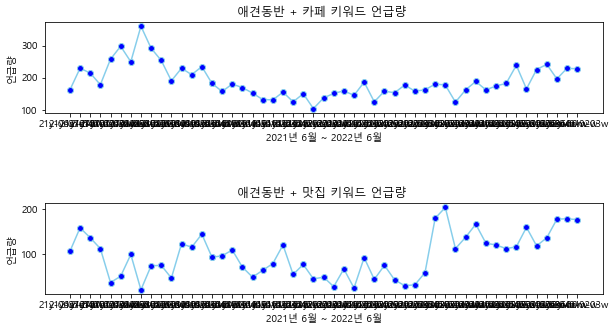

In [21]:
#plot 1 애견동반 + 카페 키워드 언급량
plt.figure(figsize=(10, 5)) #그래프 길이 조정 
plt.subplot(211) #화면을 2행1열로 나눈 것중 첫번째

plt.plot(kwd['검색기간'], kwd['카페'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('애견동반 + 카페 키워드 언급량 ')


plt.subplot(212)#화면을 2행1열로 나눈 것중 두번째
plt.plot(kwd['검색기간'], kwd['맛집'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('애견동반 + 맛집 키워드 언급량 ')




plt.subplots_adjust(hspace = 1.0) # 간격 설정
#그래프 출력
plt.show()

## plot 1 main : 애견동반 + sub: 카페 키워드 언급량

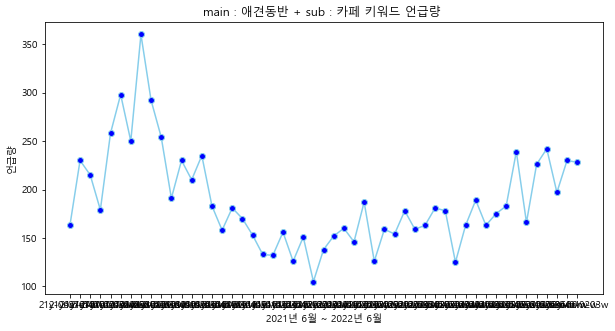

In [22]:
#plot 1 main : 애견동반 + sub : 카페 키워드 언급량
plt.figure(figsize=(10, 5)) #그래프 길이 조정 

plt.plot(kwd['검색기간'], kwd['카페'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('main : 애견동반 + sub : 카페 키워드 언급량 ')

#그래프 출력
plt.show()

## plot 2 main : 애견동반 + sub : 맛집 키워드 언급량

Text(0.5, 1.0, 'main : 애견동반 + sub : 맛집 키워드 언급량 ')

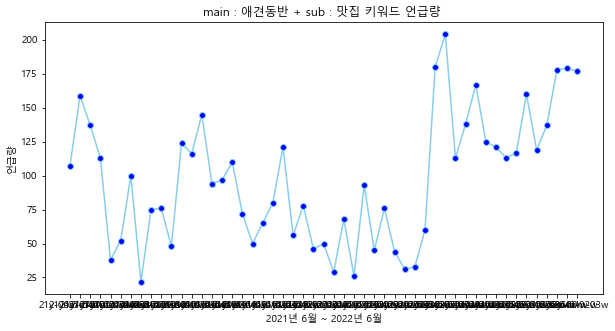

In [23]:
#plot 2 main : 애견동반 + sub : 맛집 키워드 언급량
plt.figure(figsize=(10, 5))

plt.plot(kwd['검색기간'], kwd['맛집'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('main : 애견동반 + sub : 맛집 키워드 언급량 ')

## plot 3 main : 애견동반 + sub : 식당 키워드 언급량

Text(0.5, 1.0, 'main : 애견동반 + sub : 식당 키워드 언급량 ')

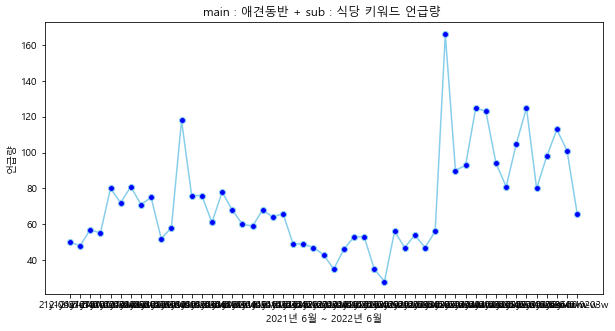

In [24]:
# plot 3 main : 애견동반 + sub : 식당 키워드 언급량
plt.figure(figsize=(10, 5))

plt.plot(kwd['검색기간'], kwd['식당'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('main : 애견동반 + sub : 식당 키워드 언급량 ')

## plot 4 main : 애견동반 + sub : 여행 키워드 언급량

Text(0.5, 1.0, 'main : 애견동반 + sub : 여행 키워드 언급량 ')

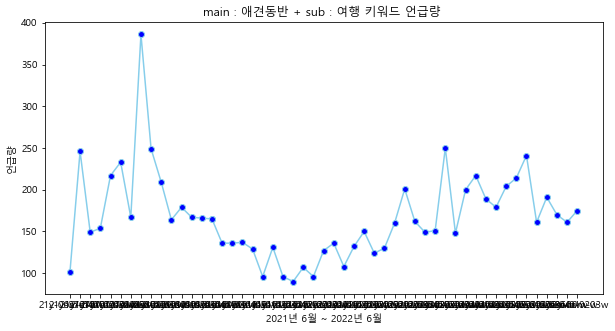

In [25]:
# plot 4 main : 애견동반 + sub : 여행 키워드 언급량
plt.figure(figsize=(10, 5))

plt.plot(kwd['검색기간'], kwd['여행'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('main : 애견동반 + sub : 여행 키워드 언급량 ')

## plot 5 main : 애견동반 + sub : 숙소 키워드 언급량

Text(0.5, 1.0, 'main : 애견동반 + sub : 숙소 키워드 언급량 ')

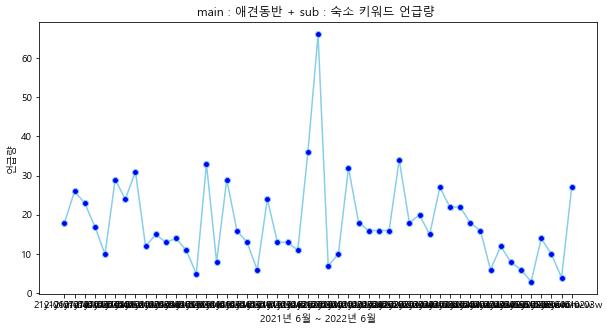

In [26]:
# plot 5 main : 애견동반 + sub : 숙소 키워드 언급량
plt.figure(figsize=(10, 5))

plt.plot(kwd['검색기간'], kwd['숙소'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('main : 애견동반 + sub : 숙소 키워드 언급량 ')

## plot 6 main : 애견동반 + sub : 데이트 키워드 언급량

Text(0.5, 1.0, 'main : 애견동반 + sub : 데이트 키워드 언급량 ')

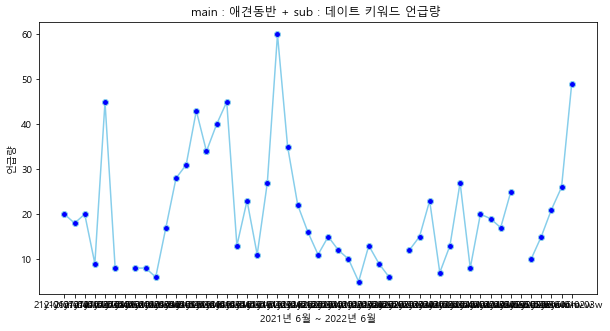

In [27]:
# plot 6 main : 애견동반 + sub : 데이트 키워드 언급량
plt.figure(figsize=(10, 5))

plt.plot(kwd['검색기간'], kwd['데이트'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('main : 애견동반 + sub : 데이트 키워드 언급량 ')

## 판다스 내장 그래프로 plot 1~ 5 피쳐 시각화 

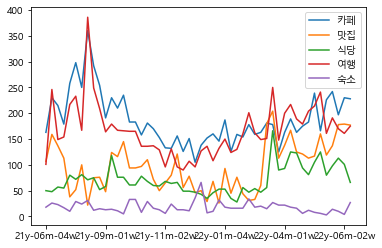

<Figure size 2160x720 with 0 Axes>

In [28]:
kwd_t[1:6].T.plot()
plt.figure(figsize = (30,10))
plt.show()

## plot 1 ~ 6 히트맵 시각화 

<AxesSubplot:>

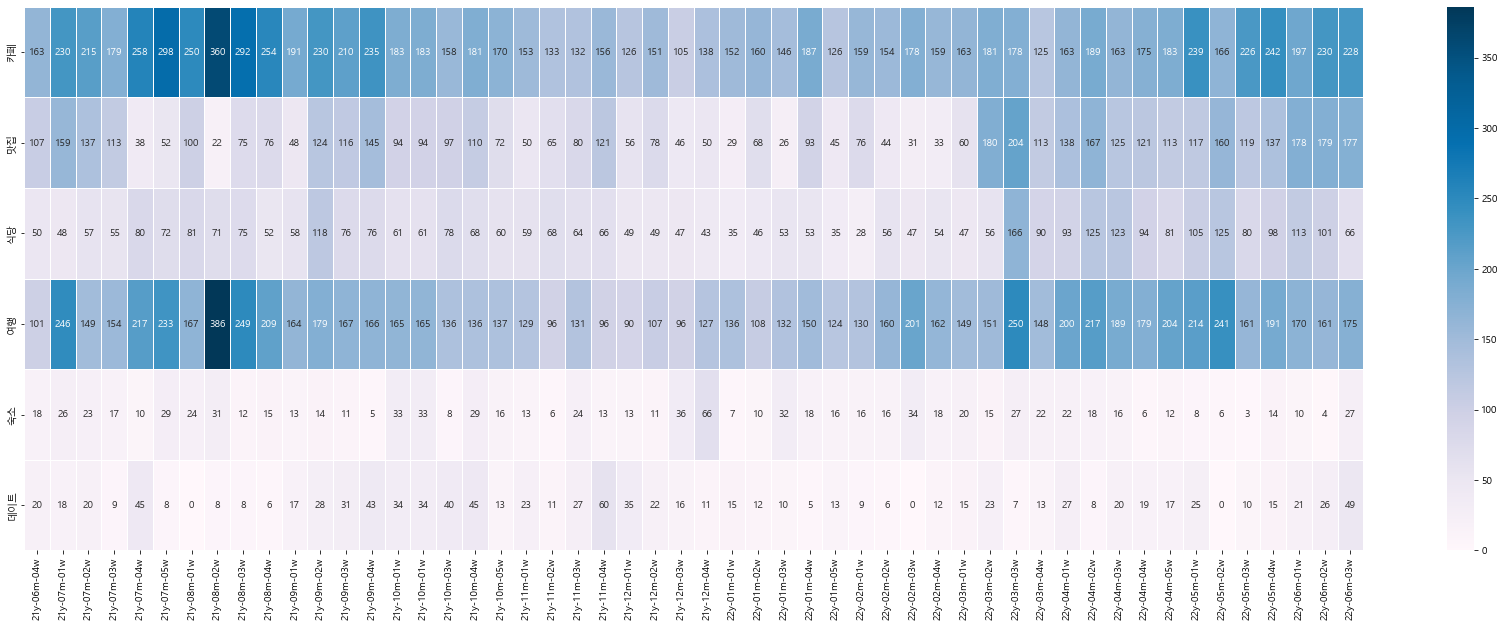

In [29]:
#히트맵으로 언급량 시각화 
a = kwd_t[1:7]


plt.figure(figsize = (30,10))
sns.heatmap(a, annot = True,
            annot_kws = {'size' : 10},
            linewidth = 0.5, 
            fmt = '.0f',
            cmap = 'PuBu')

## plot 7 main : 애견동반 + sub : 강원도 키워드 언급량

In [30]:
kwd_2 = kwd.iloc[ : 51 , : ]
kwd_2.tail()

,검색기간,애견,카페,맛집,식당,여행,숙소,데이트,강원도,부산,제주도
46,22y-05m-02w,325,166,160,125,241,6,NaN,14,57.0,53
47,22y-05m-03w,264,226,119,80,161,3,10.0,25,58.0,31
48,22y-05m-04w,296,242,137,98,191,14,15.0,17,44.0,32
49,22y-06m-01w,255,197,178,113,170,10,21.0,19,38.0,74
50,22y-06m-02w,238,230,179,101,161,4,26.0,24,18.0,58


Text(0.5, 1.0, 'main : 애견동반 + sub : 강원도 키워드 언급량 ')

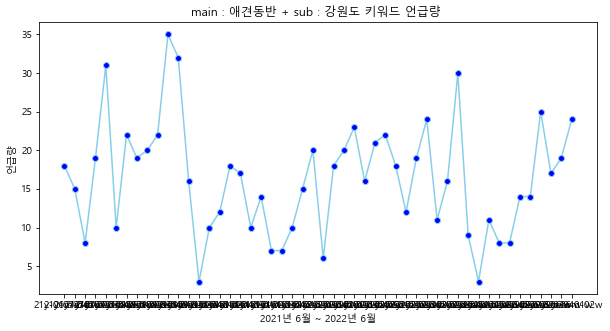

In [31]:
# plot 7 main : 애견동반 + sub : 강원도 키워드 언급량
plt.figure(figsize=(10, 5))

plt.plot(kwd_2['검색기간'], kwd_2['강원도'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('main : 애견동반 + sub : 강원도 키워드 언급량 ')

## plot 8 main : 애견동반 + sub : 제주도 키워드 언급량

Text(0.5, 1.0, 'main : 애견동반 + sub : 제주도 키워드 언급량 ')

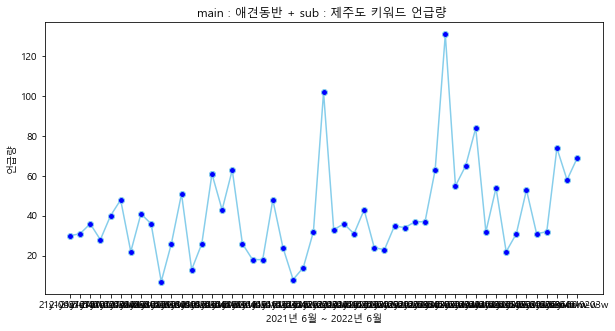

In [32]:
# plot 8 main : 애견동반 + sub : 제주도 키워드 언급량
plt.figure(figsize=(10, 5))

plt.plot(kwd['검색기간'], kwd['제주도'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('main : 애견동반 + sub : 제주도 키워드 언급량 ')

## plot 9 main : 애견동반 + sub : 부산 키워드 언급량

Text(0.5, 1.0, 'main : 애견동반 + sub : 부산 키워드 언급량 ')

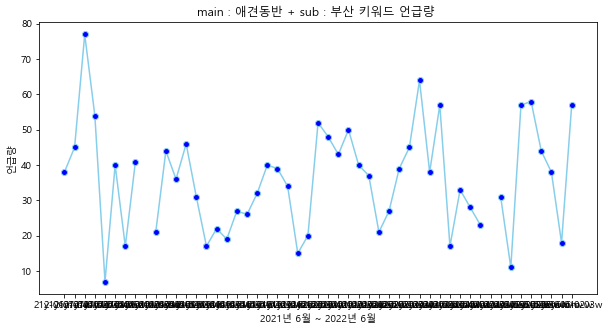

In [33]:
# plot 9 main : 애견동반 + sub : 부선 키워드 언급량
plt.figure(figsize=(10, 5))

plt.plot(kwd['검색기간'], kwd['부산'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('main : 애견동반 + sub : 부산 키워드 언급량 ')

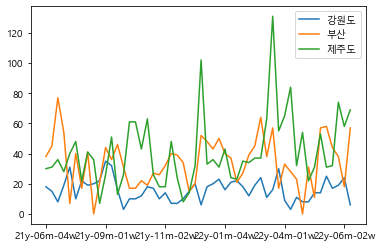

<Figure size 2160x720 with 0 Axes>

In [34]:
kwd_t[7:].T.plot()
plt.figure(figsize = (30,10))
plt.show()

<AxesSubplot:>

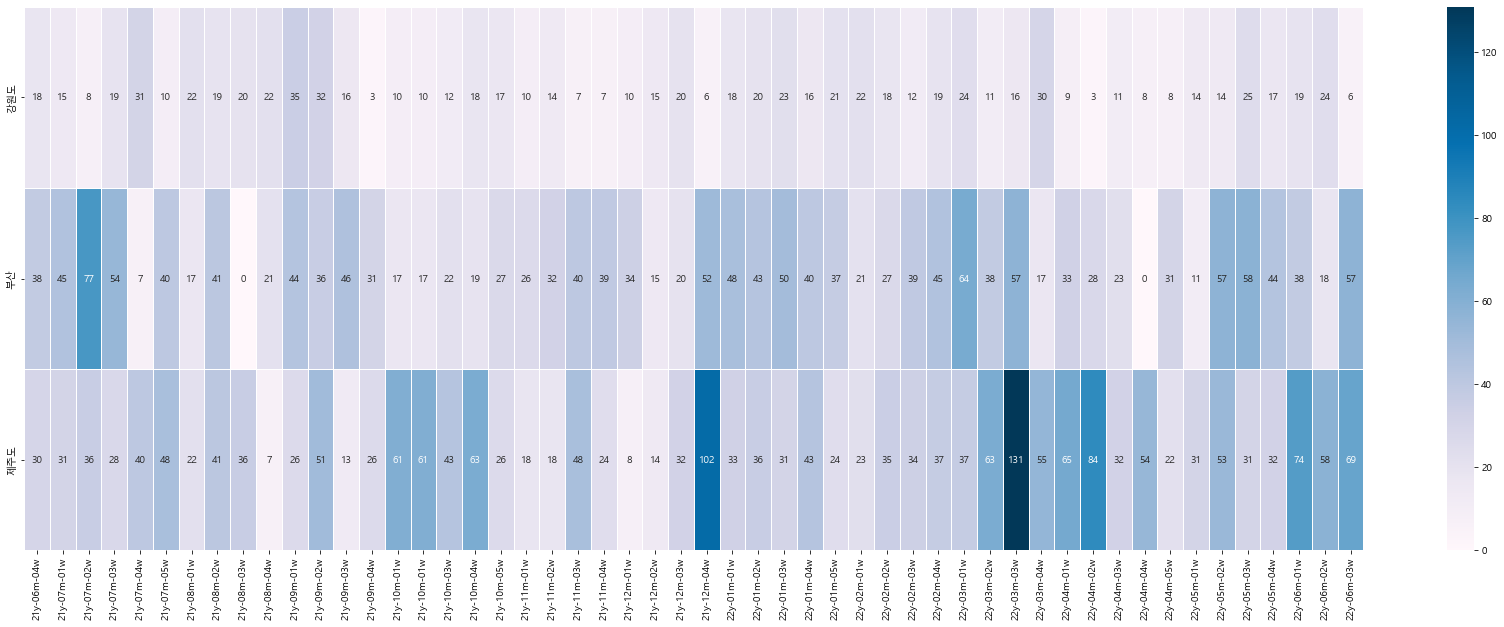

In [35]:
#히트맵으로 언급량 시각화 
a = kwd_t[7:]


plt.figure(figsize = (30,10))
sns.heatmap(a, annot = True,
            annot_kws = {'size' : 10},
            linewidth = 0.5, 
            fmt = '.0f',
            cmap = 'PuBu')

In [36]:
df['검색기간'] = df['검색기간'].str.replace('22y','2022')                   

In [37]:
df['검색기간'] = df['검색기간'].str.replace('21y','2021')   

In [38]:
 df['검색기간'] = df['검색기간'].str.replace('w','')   

In [39]:
df['검색기간'] = df['검색기간'].str.replace('m','')

In [41]:
df.to_csv('keyword.csv')